<a href="https://colab.research.google.com/github/Higgins2718/SFCrime/blob/master/sfcrimeblogpost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install arrow

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arrow

def reformat(date_string):
  frmt = 'YYYY/MM/DD HH:mm:ss A'
  return arrow.get(date_string, frmt).datetime
from datetime import datetime

def reformat_2(time_string):
  frmt = 'YYYY/MM/DD HH:mm:ss A'
  timestamp = datetime.strptime(time_string, '%H:%M')
  
  return timestamp.time()


old_crime = pd.read_csv("/content/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
new_crime = pd.read_csv("/content/Police_Department_Incident_Reports__2018_to_Present.csv")

new_crime['Incident Datetime'] = new_crime['Incident Datetime'].apply(reformat)

In [9]:
new_crime.min(axis = 0) 

Incident Year                                           2.018000e+03
Row ID                                                  6.186871e+10
Incident ID                                             6.186870e+05
Incident Number                                         0.000000e+00
CAD Number                                              1.000000e+00
Incident Code                                           1.000000e+03
CNN                                                     2.001300e+07
Supervisor District                                     1.000000e+00
Latitude                                                3.770799e+01
Longitude                                              -1.225113e+02
SF Find Neighborhoods                                   1.000000e+00
Current Police Districts                                1.000000e+00
Current Supervisor Districts                            1.000000e+00
Analysis Neighborhoods                                  1.000000e+00
HSOC Zones as of 2018-06-05       

In [10]:
old_crime.shape

(1616831, 13)

In [11]:
# Why does this dataset have 57% as many crimes as the older one (2003-18),
# despite spanning only two years?
new_crime.shape

(320060, 36)

In [12]:
# Confirm no duplicates in dataframe

new_crime.duplicated().value_counts()

False    320060
dtype: int64

In [13]:
new_crime.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019-05-01 01:00:00+00:00,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,NaN,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,POINT (-122.49962745519909 37.76256939715695),39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019-06-22 07:45:00+00:00,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655,190450880,191730737.0,II,Initial,NaN,64020,Non-Criminal,Other,Mental Health Detention,Open or Active,06TH ST \ MINNA ST,24285000.0,Southern,South of Market,6.0,37.780535,-122.408161,POINT (-122.40816079455212 37.7805353858225),32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019-06-03 16:16:00+00:00,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698,190397016,191533509.0,IS,Initial Supplement,NaN,75000,Missing Person,Missing Person,Found Person,Open or Active,EGBERT AVE \ INGALLS ST,20447000.0,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018-11-16 16:34:00+00:00,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579,180870806,183202539.0,IS,Initial Supplement,NaN,15041,Offences Against The Family And Children,Family Offenses,Elder Adult or Dependent Abuse (not Embezzleme...,Cite or Arrest Adult,MERCHANT ST \ KEARNY ST,24773000.0,Central,Chinatown,3.0,37.794860,-122.404876,POINT (-122.40487561154785 37.794859532228344),104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019-05-27 02:25:00+00:00,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092,190378555,191470256.0,II,Initial,NaN,4134,Assault,Simple Assault,Battery,Open or Active,LAGUNA ST \ UNION ST,26583000.0,Northern,Marina,2.0,37.797716,-122.430559,POINT (-122.43055896140594 37.79771621229674),15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


In [0]:
new_crime['Incident Time Datetime'] = new_crime['Incident Time'].apply(reformat_2)
new_crime['Incident Datetime'] = new_crime['Incident Datetime'].dt.tz_convert(None)
new_crime['month'] = new_crime['Incident Datetime'].dt.month

In [0]:
# Hacky approach to replace later
# Just replace : with . and convert to float

def to_float(time_string):
  processed_str = time_string.replace(":", ".")
  as_float = float(processed_str)
  return as_float

new_crime['Incident Time'] = new_crime['Incident Time'].apply(to_float)

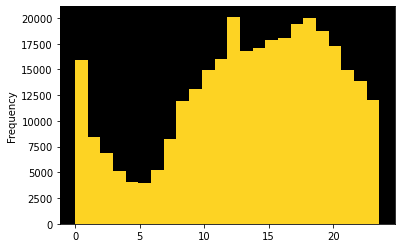

In [22]:
from pylab import hist, show, xticks
# Skyline

color = [[(253/255,211/255,35/255)]]
#background = (100/255,85/255,28/255)
background = (0/255,0/255,0/255)

# Slightly dirtier
#color = [[(207/255,179/255,28/255)]]

ax = new_crime['Incident Time'].plot.hist(bins=24, alpha=1.0, color=color)
ax.set_facecolor(background)

#new_crime['Incident Time Datetime'].plot(kind="bar")
#xticks(range(0, 24))
show()



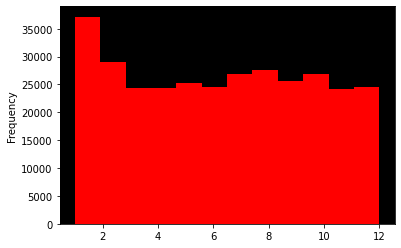

In [23]:
color = [[(253/255,211/255,35/255)]]
#background = (100/255,85/255,28/255)
background = (0/255,0/255,0/255)

# Slightly dirtier
#color = [[(207/255,179/255,28/255)]]
colors=['r']
# color each month appropriately 
ax = new_crime['month'].plot.hist(bins=12, alpha=1.0, color=colors)
ax.set_facecolor(background)

#new_crime['Incident Time Datetime'].plot(kind="bar")
#xticks(range(0, 24))
show()


In [24]:
new_crime['month'].value_counts()

1     37153
2     29067
8     27594
7     26881
10    26850
9     25615
5     25234
12    24492
6     24488
4     24282
3     24277
11    24127
Name: month, dtype: int64

In [0]:
cut = pd.cut(new_crime['month'], bins=12)